In [102]:
# library to import .mat file
import scipy.io as sio
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Rectangle
from scipy.stats import ks_2samp
from scipy.stats import ranksums
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind


In [103]:
# laoding the .mat file
preProcess = ['TCC']
Thrs = ['GL','LG','LT','SD']
MeMs =['Fastcore','Swiftcore','MBA','mCADRE','GIMME','TOCS']
# dataframe to store the data
df = pd.DataFrame(columns=['PreProcess','Threshold','MeM','Model','Accuracy','Sensitivity','Specificity','Precision','F1-score','MCC','ROC-AUC'])
for pre in preProcess:
    for thr in Thrs:
        for mem in MeMs:
            for i in range(1,65):
                data = sio.loadmat('D:\OneDrive - smail.iitm.ac.in\SprintCore\TIC\ThemOptiCS/Kim_et_al/GeneEss/'+pre+'/'+thr+'/'+mem+'/m'+str(i)+'.mat')
                # concatinating the data
                df_temp = pd.DataFrame({'PreProcess':pre,'Threshold':thr,'MeM':mem,'Model':'E'+str(2198+i),
                'Accuracy':data['accuracy'][0][0],'Sensitivity':data['sensitivity'][0][0],'Specificity':data['specificity'][0][0],'Precision':data['precision'][0][0],
                'F1-score':data['F1'][0][0],'MCC':data['MCC'][0][0],'ROC-AUC':data['roc_auc'][0][0]},index=[0])
                df = pd.concat([df,df_temp])
df = df.reset_index(drop=True)
df['Threshold'] = df['Threshold'].map({'GL':'Global-80','LG':'LocalGini','LT':'LocalT2','SD':'StanDep'})
df['Pre-Processing Method'] = df['PreProcess'].map({'FCC':'FastCC','TCC':'ThermOptCC'})
df.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8496\2448265755.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,df_temp])


,PreProcess,Threshold,MeM,Model,Accuracy,Sensitivity,Specificity,Precision,F1-score,MCC,ROC-AUC,Pre-Processing Method
0,TCC,Global-80,Fastcore,E2199,0.751553,0.848485,0.733945,0.366812,0.512195,0.438852,0.791215,ThermOptCC
1,TCC,Global-80,Fastcore,E2200,0.704974,0.884211,0.670082,0.342857,0.494118,0.414734,0.768031,ThermOptCC
2,TCC,Global-80,Fastcore,E2201,0.733229,0.821782,0.716667,0.351695,0.492582,0.406742,0.758154,ThermOptCC
3,TCC,Global-80,Fastcore,E2202,0.748512,0.826923,0.734155,0.362869,0.504399,0.424713,0.780773,ThermOptCC
4,TCC,Global-80,Fastcore,E2203,0.727575,0.860000,0.701195,0.364407,0.511905,0.427828,0.780598,ThermOptCC


In [104]:
df = df[(df['MeM']=='Fastcore') | (df['MeM']=='TOCS')]

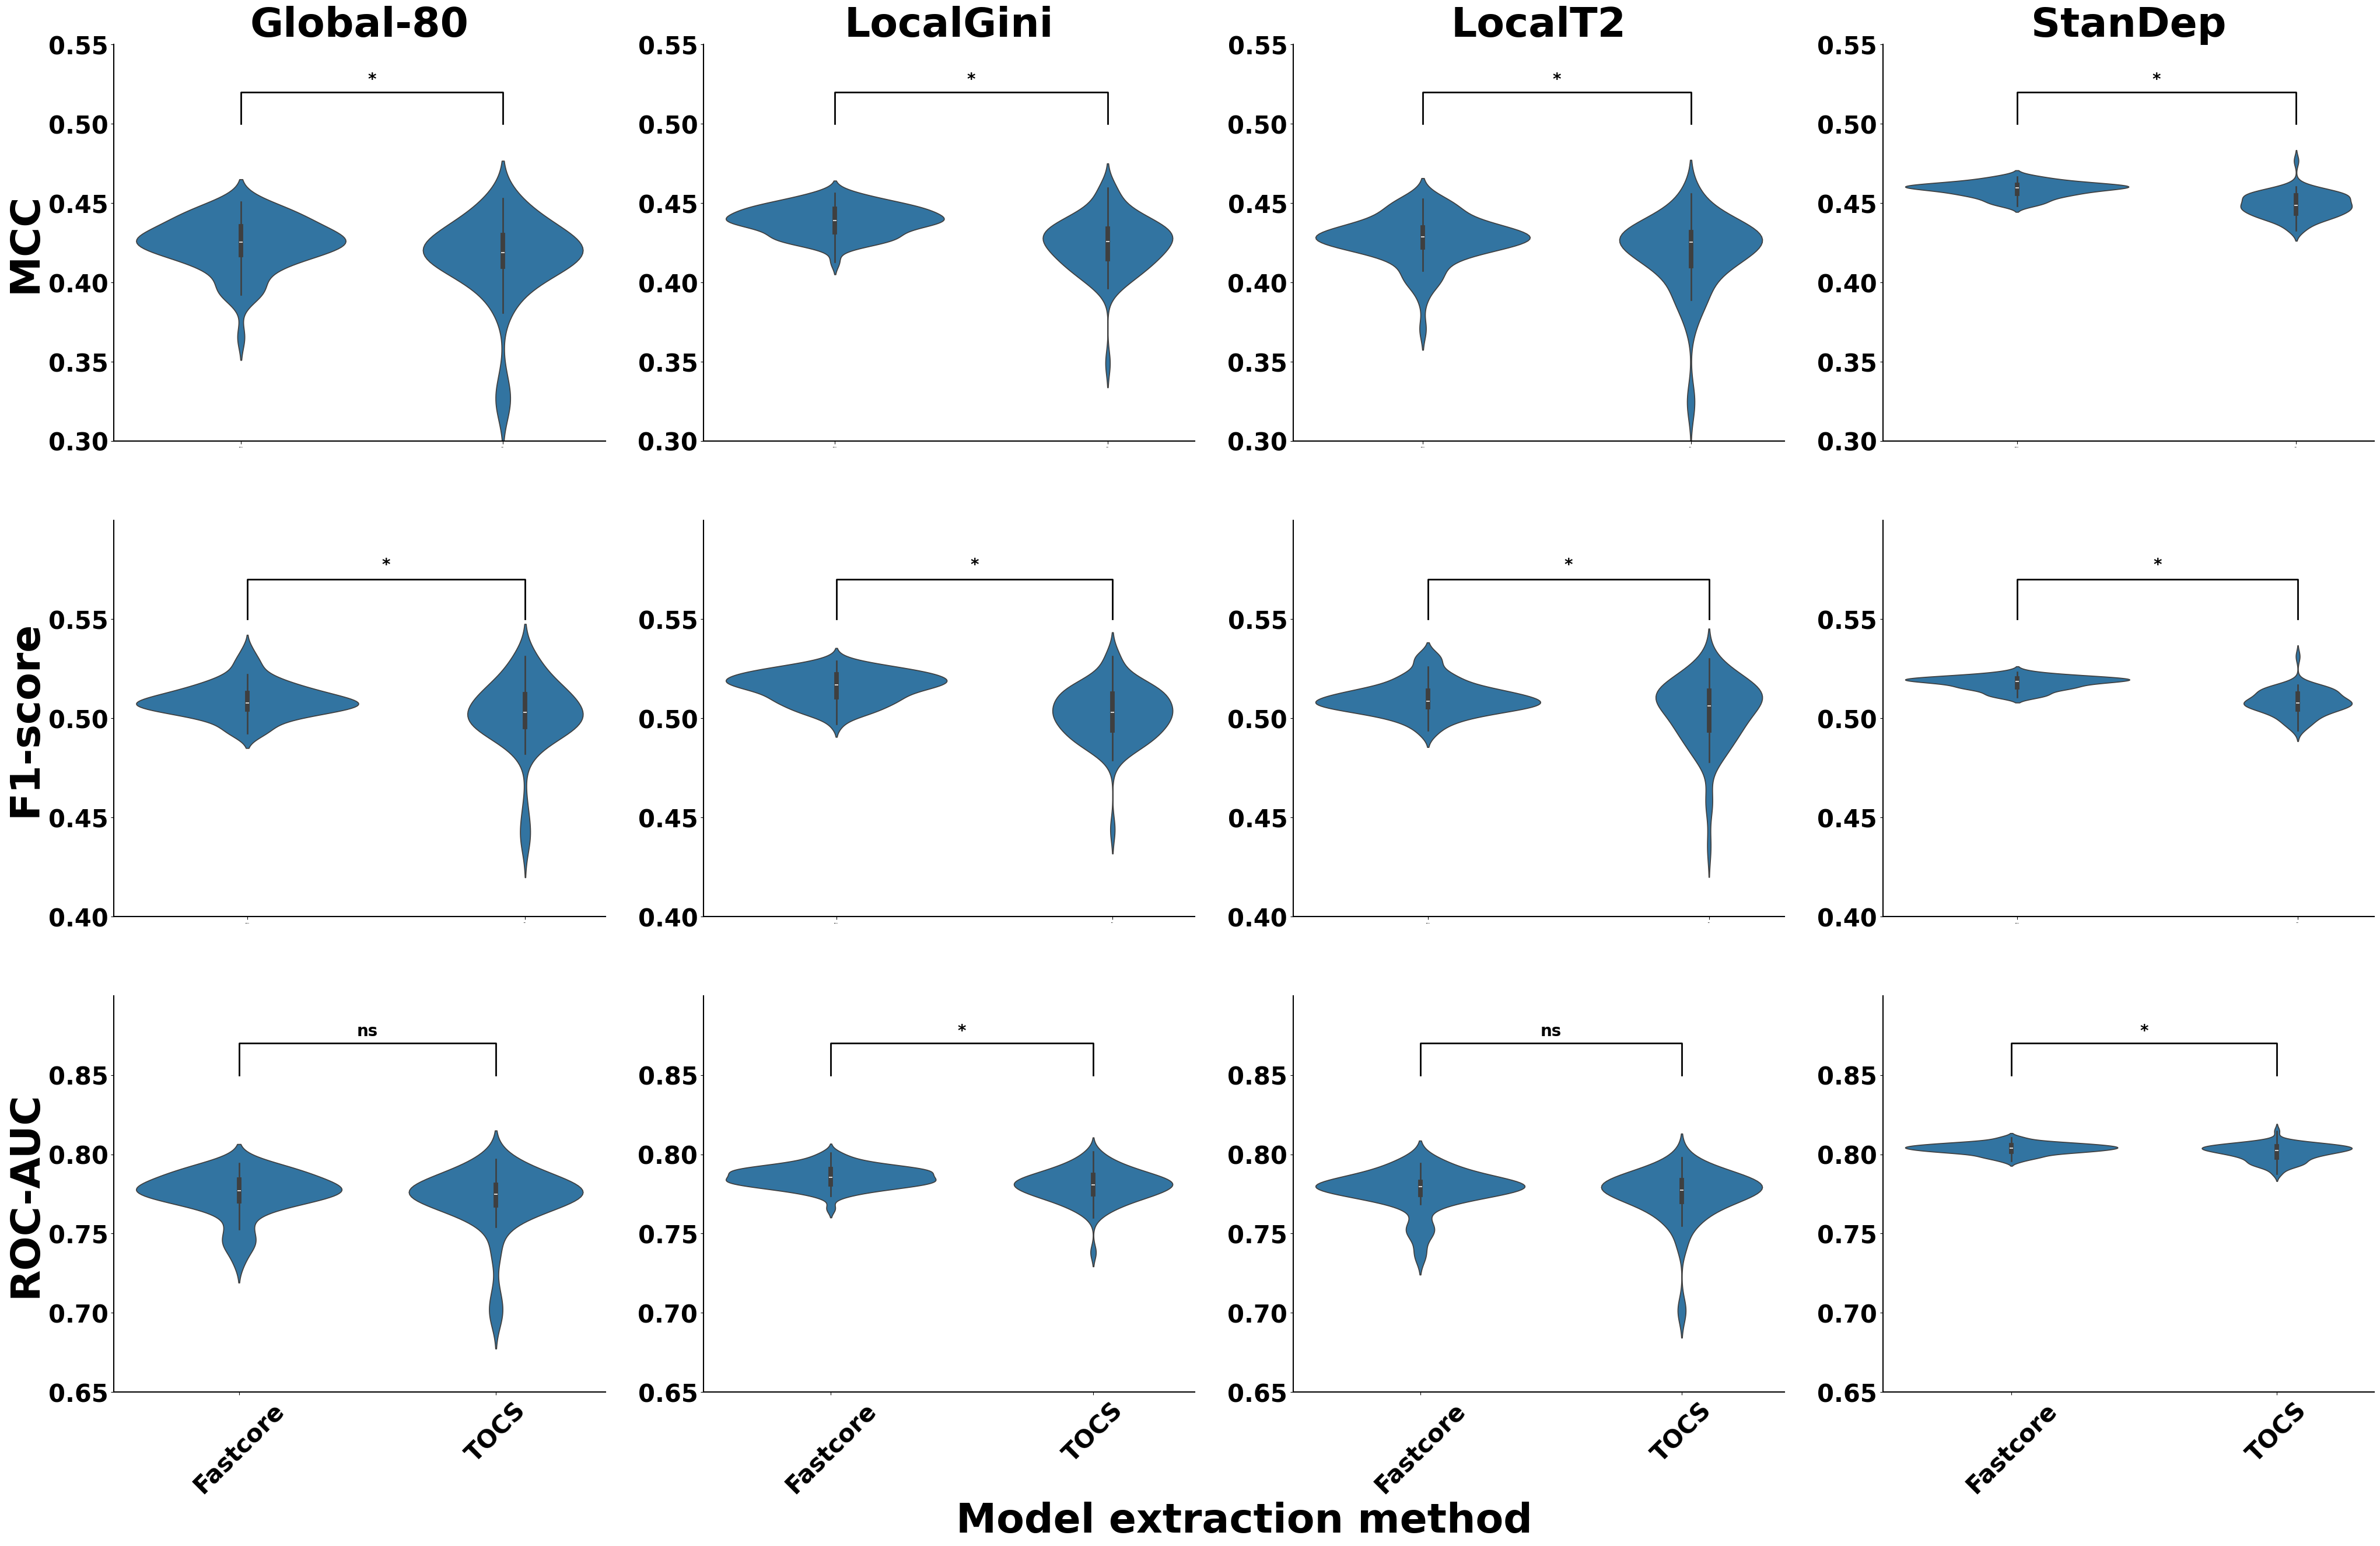

In [105]:
fig,axeses = plt.subplots(3,4,figsize=(10*5,10*3))
metrics = ['MCC','F1-score','ROC-AUC']
ylims = {'MCC':[0.3,0.55],'F1-score':[0.4,0.6],'ROC-AUC':[0.65,0.9]}
Thrs = ['Global-80','LocalGini','LocalT2','StanDep']
for i,metric in enumerate(metrics):
    axes = axeses[i]
    for t,ax in zip(Thrs,axes):
        sns.violinplot(data=df[df['Threshold']==t], x="MeM", y=metric,ax=ax)

        df_fcc = df[(df['Threshold']==t) & (df['MeM']=='Fastcore')]
        df_fcc = df_fcc.sort_values(by=['Model'])
        df_tocs = df[(df['Threshold']==t) & (df['MeM']=='TOCS')]
        df_tocs = df_tocs.sort_values(by=['Model'])
        
        result = wilcoxon(df_fcc[metric],df_tocs[metric],alternative='greater')
        # result = ks_2samp(df_tocs[metric],df_fcc[metric])
        # result = ranksums(df_tocs[metric],df_fcc[metric])
        # result = ttest_ind(df_tocs[metric],df_fcc[metric],equal_var=False)

        if result[1] < 0.01:
            text = '*'
        else:
            text = 'ns'
        # adding the p-value to the plot
        temp = ylims[metric][1] -0.05
        ax.text(0.5, temp + 0.025, text,ha='center', fontsize=20,fontweight='bold',color='k')
        ax.plot([0,0,1,1], [temp,temp+0.02,temp+0.02,temp], c='k',linewidth=2)
        if i==0:
            ax.set_title(t,fontweight='bold',fontsize=50)
        ax.set_yticks(np.arange(ylims[metric][0], ylims[metric][1], 0.05))
        ax.set_ylim(ylims[metric][0], ylims[metric][1])
        # removing the spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        # remving the ylabel
        ax.set_ylabel('')
        # removing the xlabel
        ax.set_xlabel('')
    # reducing the spces between the subplots
    # plt.subplots_adjust(wspace=0.2)
    axes[0].set_ylabel(metric,fontsize=50,fontweight='bold')
    if i==2:
        axes[2].set_xlabel('Model extraction method',fontsize=50,fontweight='bold',x=-0.1,y=-0.2)
    # bold xticks and yticks
    for ax in axes:
        if i==2:
            plt.setp(ax.get_xticklabels(), fontweight='bold',fontsize=30,rotation=45)
        else:
            plt.setp(ax.get_xticklabels(), fontweight='bold',fontsize=0)
        plt.setp(ax.get_yticklabels(), fontweight='bold',fontsize=30)
# plt.savefig('GeneEss.pdf',bbox_inches='tight')

In [106]:
df_fcc

,PreProcess,Threshold,MeM,Model,Accuracy,Sensitivity,Specificity,Precision,F1-score,MCC,ROC-AUC,Pre-Processing Method
1152,TCC,StanDep,Fastcore,E2199,0.805000,0.788462,0.807471,0.379630,0.512500,0.451425,0.797966,ThermOptCC
1153,TCC,StanDep,Fastcore,E2200,0.808271,0.807692,0.808357,0.387097,0.523364,0.466116,0.808025,ThermOptCC
1154,TCC,StanDep,Fastcore,E2201,0.808750,0.798077,0.810345,0.386047,0.520376,0.461561,0.804211,ThermOptCC
1155,TCC,StanDep,Fastcore,E2202,0.806775,0.815534,0.805476,0.383562,0.521739,0.466671,0.810505,ThermOptCC
1156,TCC,StanDep,Fastcore,E2203,0.803526,0.807692,0.802899,0.381818,0.518519,0.460282,0.805438,ThermOptCC
...,...,...,...,...,...,...,...,...,...,...,...,...
1211,TCC,StanDep,Fastcore,E2258,0.797710,0.798077,0.797654,0.375566,0.510769,0.448992,0.798014,ThermOptCC
1212,TCC,StanDep,Fastcore,E2259,0.804786,0.807692,0.804348,0.383562,0.520124,0.462025,0.806020,ThermOptCC
1213,TCC,StanDep,Fastcore,E2260,0.804756,0.798077,0.805755,0.380734,0.515528,0.456152,0.802056,ThermOptCC
1214,TCC,StanDep,Fastcore,E2261,0.803774,0.798077,0.804631,0.380734,0.515528,0.455561,0.801495,ThermOptCC


In [107]:
df_tocs

,PreProcess,Threshold,MeM,Model,Accuracy,Sensitivity,Specificity,Precision,F1-score,MCC,ROC-AUC,Pre-Processing Method
1472,TCC,StanDep,TOCS,E2199,0.795892,0.825243,0.791420,0.376106,0.516717,0.460281,0.808331,ThermOptCC
1473,TCC,StanDep,TOCS,E2200,0.790757,0.821782,0.786136,0.364035,0.504559,0.448825,0.803959,ThermOptCC
1474,TCC,StanDep,TOCS,E2201,0.812734,0.817308,0.812052,0.393519,0.531250,0.476680,0.814680,ThermOptCC
1475,TCC,StanDep,TOCS,E2202,0.792574,0.823529,0.787923,0.368421,0.509091,0.453177,0.805726,ThermOptCC
1476,TCC,StanDep,TOCS,E2203,0.790382,0.825243,0.785311,0.358650,0.500000,0.447022,0.805277,ThermOptCC
...,...,...,...,...,...,...,...,...,...,...,...,...
1531,TCC,StanDep,TOCS,E2258,0.794300,0.792453,0.794579,0.368421,0.502994,0.440420,0.793516,ThermOptCC
1532,TCC,StanDep,TOCS,E2259,0.792839,0.823529,0.788235,0.368421,0.509091,0.453332,0.805882,ThermOptCC
1533,TCC,StanDep,TOCS,E2260,0.791563,0.813725,0.788352,0.357759,0.497006,0.442119,0.801039,ThermOptCC
1534,TCC,StanDep,TOCS,E2261,0.798765,0.807692,0.797450,0.370044,0.507553,0.450744,0.802571,ThermOptCC


In [108]:
res[1]

np.float64(0.0)

In [109]:
import scipy.stats as stats

In [110]:
sample2 = stats.norm.rvs(size=95, random_state=0)
sample1 = stats.norm.rvs(size=105, loc=10, random_state=0)
stats.ks_2samp(sample1, sample2, alternative='less')

KstestResult(statistic=np.float64(1.0), pvalue=np.float64(1.4164323608662125e-59), statistic_location=np.float64(2.2697546239876076), statistic_sign=np.int8(-1))